In [1]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
import pandas as pd
import datetime as dt
import math
import numpy as np
import time
import matplotlib.pyplot as plt
import numpy as np

In [45]:
tcs_nov=pd.read_csv("/home/pogo/Desktop/Ba/Desktop/Books/Capstone/Phase 2/Parallel/Data/STOCKS/MMYT_All.csv",usecols=['Date','Close'])
tcs_oct=pd.read_csv("/home/pogo/Desktop/Ba/Desktop/Books/Capstone/Phase 2/Parallel/Data/STOCKS/MMYT.csv",usecols=['Date','Close'])
df_read=pd.concat([tcs_nov,tcs_oct],axis=0)

In [46]:
df_read=df_read.reset_index(drop=True)
df_read.dropna(inplace=True)
df_read1=df_read.copy()

In [47]:
fore=df_read1[df_read1['Date']>='2021-01-01'].shape[0]
df_read1['Prediction'] = df_read1[['Close']].shift(-fore)

In [48]:
def p_chan(x,y):
    return ((y-x)/x)*100

In [49]:
def accuracy(x):
    if x<0:
        return 100+x
    else:
        return 100-x

In [50]:
X1=df_read1[['Close','Prediction']]
X = np.array(X1.drop(['Prediction'],1))
X = X[:-fore]

In [51]:
y = np.array(df_read1['Prediction'])
y = y[:-fore]

In [52]:
def get_accuracy_pred_confidence(ts,g,c1):
    x_train, x_test, y_train, y_test = train_test_split(X, y,test_size=ts,random_state=42)
    svr = SVR(kernel='rbf',gamma=g, C=c1)
    svr.fit(x_train, y_train)
    svm_confidence = svr.score(x_test, y_test)
    X2=df_read1[['Close','Prediction']]
    forecast = np.array(X2.drop(['Prediction'],1))[-fore:]
    svm_prediction = svr.predict(forecast)
    a1=df_read1[df_read1['Date']>='2021-01-01']
    c=pd.DataFrame()
    c['Date']=list(a1['Date'])
    c['Predicted']=list(svm_prediction)
    c['Actual Close']=list(a1['Close'])
    diff=[]
    for i in range(len(list(c['Predicted']))):
        diff.append(p_chan(list(c['Actual Close'])[i],list(c['Predicted'])[i]))
    c['Difference']=diff
    accu=[]
    for i in range(len(list(c['Difference']))):
        accu.append(accuracy(list(c['Difference'])[i]))
    c['Accuracy']=accu
    res=dict()
    res['Train']=(1-ts)*100
    res['Test']=ts*100
    res['Gamma']=g
    res['Regularization Parameter']=c1
    res['Confidence Score']=round(svm_confidence,2)
    res['Accuracy']=round(c["Accuracy"].mean(),2)
    return res

In [53]:
test_size=[0.15,0.2,0.3]
gamma=[0.1,0.01,0.005]
C=[10,100,1]

In [54]:
df_res=pd.DataFrame()
for i1 in test_size:
    for i2 in gamma:
        for i3 in C:
            d1=pd.DataFrame(get_accuracy_pred_confidence(i1,i2,i3).values())
            d2=d1.T.copy()
            try:
                df_res=pd.concat([df_res,d2],axis=0)
            except:
                df_res=d2
df_res.columns=['Train','Test','Gamma','Regularization Parameter','Confidence Score','Accuracy']            
df_res

,Train,Test,Gamma,Regularization Parameter,Confidence Score,Accuracy
0,85.0,15.0,0.100,10.0,0.79,97.18
0,85.0,15.0,0.100,100.0,0.79,97.05
0,85.0,15.0,0.100,1.0,0.79,98.40
0,85.0,15.0,0.010,10.0,0.79,98.87
0,85.0,15.0,0.010,100.0,0.79,98.33
0,85.0,15.0,0.010,1.0,0.79,99.72
0,85.0,15.0,0.005,10.0,0.79,99.24
0,85.0,15.0,0.005,100.0,0.79,99.87
0,85.0,15.0,0.005,1.0,0.78,98.38
0,80.0,20.0,0.100,10.0,0.80,97.22


In [55]:
df_res['Train:Test']=df_res['Train'].astype(str)+":"+df_res['Test'].astype(str)
df_res

,Train,Test,Gamma,Regularization Parameter,Confidence Score,Accuracy,Train:Test
0,85.0,15.0,0.100,10.0,0.79,97.18,85.0:15.0
0,85.0,15.0,0.100,100.0,0.79,97.05,85.0:15.0
0,85.0,15.0,0.100,1.0,0.79,98.40,85.0:15.0
0,85.0,15.0,0.010,10.0,0.79,98.87,85.0:15.0
0,85.0,15.0,0.010,100.0,0.79,98.33,85.0:15.0
0,85.0,15.0,0.010,1.0,0.79,99.72,85.0:15.0
0,85.0,15.0,0.005,10.0,0.79,99.24,85.0:15.0
0,85.0,15.0,0.005,100.0,0.79,99.87,85.0:15.0
0,85.0,15.0,0.005,1.0,0.78,98.38,85.0:15.0
0,80.0,20.0,0.100,10.0,0.80,97.22,80.0:20.0


In [56]:
df_res.shape

(27, 7)

In [57]:
df_res.to_excel("/home/pogo/Desktop/Ba/Desktop/Books/Capstone/Phase 2/Parallel/Data/CALCULATIONS/MMYT_final_res.xlsx",index=0)

In [16]:
#conf=1 and train:test
gr_1=df_res[df_res['Regularization Parameter']==1000]
gr_1

,Train,Test,Gamma,Regularization Parameter,Confidence Score,Accuracy,Train:Test
0,90.0,10.0,0.100,1000.0,0.84,62.54,90.0:10.0
0,90.0,10.0,0.500,1000.0,0.75,60.07,90.0:10.0
0,90.0,10.0,0.050,1000.0,0.86,63.12,90.0:10.0
0,90.0,10.0,0.010,1000.0,0.90,65.04,90.0:10.0
0,90.0,10.0,0.005,1000.0,0.94,65.72,90.0:10.0
0,85.0,15.0,0.100,1000.0,0.79,62.08,85.0:15.0
0,85.0,15.0,0.500,1000.0,0.71,59.80,85.0:15.0
0,85.0,15.0,0.050,1000.0,0.82,62.54,85.0:15.0
0,85.0,15.0,0.010,1000.0,0.90,64.44,85.0:15.0
0,85.0,15.0,0.005,1000.0,0.93,65.17,85.0:15.0


<ipython-input-17-c8d3c75675e1>:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figure.show()


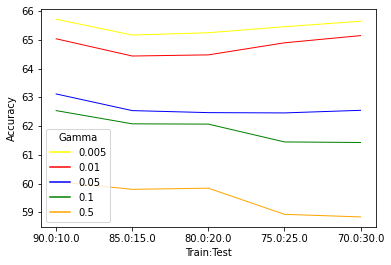

In [17]:
import seaborn as sns
plot1_img=sns.lineplot(x="Train:Test", y="Accuracy", data=gr_1, hue="Gamma",palette=['yellow','red','blue','green'], linewidth=1)
figure = plot1_img.get_figure()    
figure.show()
figure.savefig('/home/pogo/Desktop/Ba/Desktop/Books/Capstone/Phase 2/Parallel/Data/GRAPHS/Gamma_10000_Accuracy_TCS.png', dpi=400)